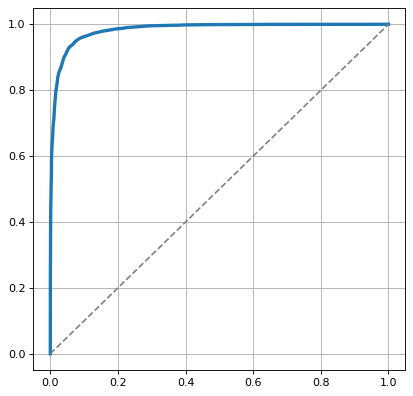

In [11]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
sample0 = x_train[y_train==0]/255.
sample1 = x_train[y_train==1]/255.

all_mean0 = sample0.mean(axis=(1,2))
all_mean1 = sample1.mean(axis=(1,2))

thresholds = np.linspace(0.0,0.4,200)

roc_y = np.array([(all_mean1<th).sum()/len(all_mean1) for th in thresholds])
roc_x = np.array([(all_mean0<th).sum()/len(all_mean0) for th in thresholds])

fig = plt.figure(figsize=(6,6), dpi=80)
plt.plot(roc_x, roc_y, lw=3)
plt.plot([0,1],[0,1], ls='--', c='gray')
plt.grid()
plt.show()

AUC(average of all pixels):  0.9835292813693863
AUC(average of centered pixels):  0.9385434043226454
AUC(Fisher discriminant):  0.9991817016088953


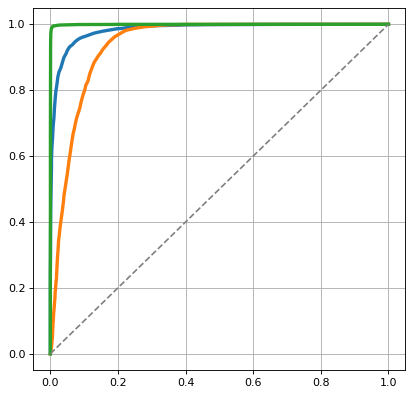

In [15]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
sample0 = x_train[y_train==0]/255.
sample1 = x_train[y_train==1]/255.

var0 = np.vstack([sample0.mean(axis=(1,2)),sample0[:,10:18,11:17].mean(axis=(1,2))])
var1 = np.vstack([sample1.mean(axis=(1,2)),sample1[:,10:18,11:17].mean(axis=(1,2))])
mu0, cov0 = var0.mean(axis=1), np.cov(var0)
mu1, cov1 = var1.mean(axis=1), np.cov(var1)
weight = np.dot(linalg.inv(cov1+cov0),mu1-mu0)
norm = np.sqrt((weight**2).sum())
weight /= norm
out0 = (var0.T*weight).sum(axis=1)
out1 = (var1.T*weight).sum(axis=1)

roc1_y = np.array([(var1[0]<th).sum()/len(var1[0]) for th in np.linspace(0.0,0.4,200)])
roc1_x = np.array([(var0[0]<th).sum()/len(var0[0]) for th in np.linspace(0.0,0.4,200)])
roc2_y = np.array([(var1[1]>th).sum()/len(var1[1]) for th in np.linspace(-0.01,1.,200)])
roc2_x = np.array([(var0[1]>th).sum()/len(var0[1]) for th in np.linspace(-0.01,1.,200)])
roc3_y = np.array([(out1>th).sum()/len(out1) for th in np.linspace(-0.3,0.1,200)])
roc3_x = np.array([(out0>th).sum()/len(out0) for th in np.linspace(-0.3,0.1,200)])

auc1, auc2, auc3 = 0., 0., 0.
for i in range(200-1):
    h = abs(roc1_x[i+1]-roc1_x[i])
    auc1 += h*(roc1_y[i+1]+roc1_y[i])*0.5
    h = abs(roc2_x[i+1]-roc2_x[i])
    auc2 += h*(roc2_y[i+1]+roc2_y[i])*0.5
    h = abs(roc3_x[i+1]-roc3_x[i])
    auc3 += h*(roc3_y[i+1]+roc3_y[i])*0.5

print('AUC(average of all pixels): ',auc1)
print('AUC(average of centered pixels): ',auc2)
print('AUC(Fisher discriminant): ',auc3)

fig = plt.figure(figsize=(6,6), dpi=80)
plt.plot(roc1_x, roc1_y, lw=3)
plt.plot(roc2_x, roc2_y, lw=3)
plt.plot(roc3_x, roc3_y, lw=3)
plt.plot([0,1],[0,1], ls='--', c='gray')
plt.grid()
plt.show()


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
mnist = np.load('mnist.npz')
x_train = mnist['x_train'][mnist['y_train']<=1]/255.
y_train = mnist['y_train'][mnist['y_train']<=1]
x_test = mnist['x_test'][mnist['y_test']<=1]/255.
y_test = mnist['y_test'][mnist['y_test']<=1]
x_train = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_train])
x_test = np.array([[img.mean(),img[10:18,11:17].mean()] for img in x_test])
clf = LinearDiscriminantAnalysis()
f_train = clf.fit_transform(x_train, y_train)
s_train = clf.score(x_train, y_train)
s_test = clf.score(x_test, y_test)
print('Performance (training):', s_train)
print('Performance (testing):', s_test)

Performance (training): 0.9829451243584683
Performance (testing): 0.9867612293144208


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
mnist = np.load('mnist.npz')
x_train = mnist['x_train'][mnist['y_train']>=7]/255.
y_train = mnist['y_train'][mnist['y_train']>=7]

x_train = np.array([img.reshape((784,)) for img in x_train[:3000]])
y_train = y_train[:3000]

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


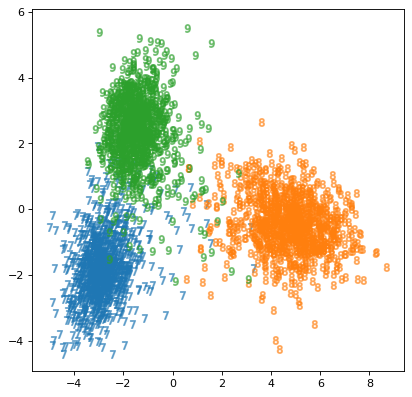

In [32]:
clf = LinearDiscriminantAnalysis(n_components=2)
f_train = clf.fit_transform(x_train, y_train)
fig = plt.figure(figsize=(6,6), dpi=80)
for i in range(7,10):
 plt.scatter(f_train[:,0][y_train==i], f_train[:,1][y_train==i],
 s=50, marker='$'+str(i)+'$', alpha=0.5)
plt.show()

In [28]:
f_train[:,0]#[y_train==i]

array([-0.9479228 , -3.07540803,  3.64125803, ..., -2.36473486,
       -2.47087728,  5.15768413])

In [26]:
f_train

array([[-0.9479228 ,  2.56271783],
       [-3.07540803, -0.79852688],
       [ 3.64125803,  0.03914148],
       ...,
       [-2.36473486, -1.4824836 ],
       [-2.47087728, -0.48321424],
       [ 5.15768413, -0.39705336]])

In [30]:
f_train[:,0][1]

-3.075408030227977

In [ ]:
#project後平均值盡量拉開、標準差壓小

In [165]:
A=np.array([[[1,5,0],[1,1,8],[1,0,5]],[[0,5,0],[1,1,5],[0,8,2]]])
B=np.array([[[0,5,0],[1,0,0],[4,5,6]],[[5,5,1],[1,1,0],[0,0,0]]])

In [156]:
import numpy as np

def calc_fisher_dist(A, B):
    FA = np.zeros(len(A))
    FB = np.zeros(len(B))
    Fmin = 0.
    Fmax = 0.
    ### START YOUR CODE HERE ###
    
    W = np.zeros(3)
    varA=np.zeros((3,len(A)))
    varB=np.zeros((3,len(A)))
    for k in range(0,len(A)):
         for i in range(0,3):   
            for j in range(0,3):
                varA[0][k]+=(A[k][i][3-1-j]-A[k][i][j])**2
                varA[1][k]+=(A[k][3-1-i][j]-A[k][i][j])**2
                varA[2][k]+=(A[k][3-1-j][i]-A[k][i][j])**2
    for k in range(0,len(B)):
         for i in range(0,3):   
            for j in range(0,3):
                varB[0][k]+=(B[k][i][3-1-j]-B[k][i][j])**2
                varB[1][k]+=(B[k][3-1-i][j]-B[k][i][j])**2
                varB[2][k]+=(B[k][3-1-j][i]-B[k][i][j])**2
                
    muA = varA.mean(axis=1)
    muB = varB.mean(axis=1)
    covA = np.cov(varA)
    covB = np.cov(varB)
    W = np.dot(np.linalg.inv(covA+covB),muA-muB)
    norm = np.sqrt((W**2).sum())
    W /= norm
    
    
    for i in range(0,len(A)):
        FA[i]=varA[0,i]*W[0]+varA[1,i]*W[1]+varA[2,i]*W[2]
    
    for i in range(0,len(B)):
        FB[i]=varB[0,i]*W[0]+varB[1,i]*W[1]+varB[2,i]*W[2]
    
    Fmin=np.min(np.concatenate([FA,FB]),axis=0)
    Fmax=np.max(np.concatenate([FA,FB]),axis=0)
      
     

    #### END YOUR CODE HERE ####
    return FA, FB, float(Fmin), float(Fmax)


In [157]:
calc_fisher_dist(A, B)

(array([20.67641522, 20.67641522]),
 array([-43.95379725, -43.95379725]),
 -43.95379724570931,
 20.676415223237008)

In [158]:
calc_fisher_dist(A, B)

(array([20.67641522, 20.67641522]),
 array([-43.95379725, -43.95379725]),
 -43.95379724570931,
 20.676415223237008)

In [233]:
B=np.array([[[1,5,0],[1,1,8],[1,0,5]],[[0,5,0],[1,1,5],[0,8,2]]])
A=np.array([[[0,5,0],[1,0,0],[4,5,6]],[[5,5,1],[1,1,0],[0,0,0]]])

In [173]:
import numpy as np

def calc_fisher_dist(A, B):
    FA = np.zeros(len(A))
    FB = np.zeros(len(B))
    Fmin = 0.
    Fmax = 0.
    ### START YOUR CODE HERE ###
    arraysize=3
    W = np.zeros(3)
    varA=np.zeros((3,len(A)))
    varB=np.zeros((3,len(B)))
    for k in range(0,len(A)):
         for i in range(0,arraysize):   
            for j in range(0,arraysize):
                varA[0][k]+=(A[k][i][arraysize-1-j]-A[k][i][j])**2
                varA[1][k]+=(A[k][arraysize-1-i][j]-A[k][i][j])**2
                varA[2][k]+=(A[k][arraysize-1-j][i]-A[k][i][j])**2
    for k in range(0,len(B)):
         for i in range(0,arraysize):   
            for j in range(0,arraysize):
                varB[0][k]+=(B[k][i][arraysize-1-j]-B[k][i][j])**2
                varB[1][k]+=(B[k][arraysize-1-i][j]-B[k][i][j])**2
                varB[2][k]+=(B[k][arraysize-1-j][i]-B[k][i][j])**2
                
    muA = varA.mean(axis=1)
    muB = varB.mean(axis=1)
    covA = np.cov(varA)
    covB = np.cov(varB)
    W = np.dot(np.linalg.inv(covA+covB),muA-muB)
    norm = np.sqrt((W**2).sum())
    W /= norm
    
    
    for i in range(0,len(A)):
        FA[i]=varA[0,i]*W[0]+varA[1,i]*W[1]+varA[2,i]*W[2]
    
    for i in range(0,len(B)):
        FB[i]=varB[0,i]*W[0]+varB[1,i]*W[1]+varB[2,i]*W[2]
    
    Fmin=np.min(np.concatenate([FA,FB]),axis=0)
    Fmax=np.max(np.concatenate([FA,FB]),axis=0)
      
     

    #### END YOUR CODE HERE ####
    return FA, FB, float(Fmin), float(Fmax)


In [175]:
calc_fisher_dist(A, B)

(array([20.67641522, 20.67641522]),
 array([-43.95379725, -43.95379725]),
 -43.95379724570931,
 20.676415223237008)

In [357]:
import numpy as np

def calc_roc_curve(A, B):
    ROC = np.zeros((2,51))
    ### START YOUR CODE HERE ###
    
    FA = np.zeros(len(A))
    FB = np.zeros(len(B))
    Fmin = 0.
    Fmax = 0.

    arraysize=3
    W = np.zeros(3)
    varA=np.zeros((3,len(A)))
    varB=np.zeros((3,len(B)))
    for k in range(0,len(A)):
         for i in range(0,arraysize):   
            for j in range(0,arraysize):
                varA[0][k]+=(A[k][i][arraysize-1-j]-A[k][i][j])**2
                varA[1][k]+=(A[k][arraysize-1-i][j]-A[k][i][j])**2
                varA[2][k]+=(A[k][arraysize-1-j][i]-A[k][i][j])**2
    for k in range(0,len(B)):
         for i in range(0,arraysize):   
            for j in range(0,arraysize):
                varB[0][k]+=(B[k][i][arraysize-1-j]-B[k][i][j])**2
                varB[1][k]+=(B[k][arraysize-1-i][j]-B[k][i][j])**2
                varB[2][k]+=(B[k][arraysize-1-j][i]-B[k][i][j])**2
                
    muA = varA.mean(axis=1)
    muB = varB.mean(axis=1)
    covA = np.cov(varA)
    covB = np.cov(varB)
    W = np.dot(np.linalg.inv(covA+covB),muA-muB)
    norm = np.sqrt((W**2).sum())
    W /= norm
    
    
    for i in range(0,len(A)):
        FA[i]=varA[0,i]*W[0]+varA[1,i]*W[1]+varA[2,i]*W[2]
    
    for i in range(0,len(B)):
        FB[i]=varB[0,i]*W[0]+varB[1,i]*W[1]+varB[2,i]*W[2]
    
    Fmin=np.min(np.concatenate([FA,FB]),axis=0)
    Fmax=np.max(np.concatenate([FA,FB]),axis=0)
    

    
    for i in range (0,51):
        T=Fmin+(i*(Fmax-Fmin)/50)
        
        T=round(T,7)
        FA=FA.round(7)
        FB=FB.round(7)
        
        FAeff=len(FA[FA>T])
        FBeff=len(FB[FB>T])
        
        ROC[0][i]=FAeff/len(A)
        ROC[1][i]=FBeff/len(B)
        
    

    #### END YOUR CODE HERE ####
    return ROC


In [358]:
calc_roc_curve(A, B)

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]]),
 array([43.9537972, 43.9537972]),
 array([-20.6764152, -20.6764152]))

In [320]:
len(A)

2

In [311]:
ROC = np.zeros(51)
for i in range (0,51):

    ROC[i]=i

In [318]:
ROC2=ROC[ROC>20]

In [319]:
len(ROC)

51

In [343]:
FA=np.array([4.22222,5.66666])
FA=FA.round(1)

In [344]:
FA

array([4.2, 5.7])

In [ ]:
# HW1

In [170]:
import numpy as np

def calc_fisher_dist(A, B):
    FA = np.zeros(len(A))
    FB = np.zeros(len(B))
    Fmin = 0.
    Fmax = 0.
    ### START YOUR CODE HERE ###
    arraysize=14
    W = np.zeros(3)
    varA=np.zeros((3,len(A)))
    varB=np.zeros((3,len(B)))
    for k in range(0,len(A)):
         for i in range(0,arraysize):   
            for j in range(0,arraysize):
                varA[0][k]+=(A[k][i][arraysize-1-j]-A[k][i][j])**2
                varA[1][k]+=(A[k][arraysize-1-i][j]-A[k][i][j])**2
                varA[2][k]+=(A[k][arraysize-1-j][i]-A[k][i][j])**2
    for k in range(0,len(B)):
         for i in range(0,arraysize):   
            for j in range(0,arraysize):
                varB[0][k]+=(B[k][i][arraysize-1-j]-B[k][i][j])**2
                varB[1][k]+=(B[k][arraysize-1-i][j]-B[k][i][j])**2
                varB[2][k]+=(B[k][arraysize-1-j][i]-B[k][i][j])**2
                
    muA = varA.mean(axis=1)
    muB = varB.mean(axis=1)
    covA = np.cov(varA)
    covB = np.cov(varB)
    W = np.dot(np.linalg.inv(covA+covB),muA-muB)
    norm = np.sqrt((W**2).sum())
    W /= norm
    
    
    for i in range(0,len(A)):
        FA[i]=varA[0,i]*W[0]+varA[1,i]*W[1]+varA[2,i]*W[2]
    
    for i in range(0,len(B)):
        FB[i]=varB[0,i]*W[0]+varB[1,i]*W[1]+varB[2,i]*W[2]
    
    Fmin=np.min(np.concatenate([FA,FB]),axis=0)
    Fmax=np.max(np.concatenate([FA,FB]),axis=0)
      
     

    #### END YOUR CODE HERE ####
    return FA, FB, float(Fmin), float(Fmax)


In [ ]:
# HW2

In [ ]:
import numpy as np

def calc_roc_curve(A, B):
    ROC = np.zeros((2,51))
    ### START YOUR CODE HERE ###
    
    FA = np.zeros(len(A))
    FB = np.zeros(len(B))
    Fmin = 0.
    Fmax = 0.

    arraysize=14
    W = np.zeros(3)
    varA=np.zeros((3,len(A)))
    varB=np.zeros((3,len(B)))
    for k in range(0,len(A)):
         for i in range(0,arraysize):   
            for j in range(0,arraysize):
                varA[0][k]+=(A[k][i][arraysize-1-j]-A[k][i][j])**2
                varA[1][k]+=(A[k][arraysize-1-i][j]-A[k][i][j])**2
                varA[2][k]+=(A[k][arraysize-1-j][i]-A[k][i][j])**2
    for k in range(0,len(B)):
         for i in range(0,arraysize):   
            for j in range(0,arraysize):
                varB[0][k]+=(B[k][i][arraysize-1-j]-B[k][i][j])**2
                varB[1][k]+=(B[k][arraysize-1-i][j]-B[k][i][j])**2
                varB[2][k]+=(B[k][arraysize-1-j][i]-B[k][i][j])**2
                
    muA = varA.mean(axis=1)
    muB = varB.mean(axis=1)
    covA = np.cov(varA)
    covB = np.cov(varB)
    W = np.dot(np.linalg.inv(covA+covB),muA-muB)
    norm = np.sqrt((W**2).sum())
    W /= norm
    
    
    for i in range(0,len(A)):
        FA[i]=varA[0,i]*W[0]+varA[1,i]*W[1]+varA[2,i]*W[2]
    
    for i in range(0,len(B)):
        FB[i]=varB[0,i]*W[0]+varB[1,i]*W[1]+varB[2,i]*W[2]
    
    Fmin=np.min(np.concatenate([FA,FB]),axis=0)
    Fmax=np.max(np.concatenate([FA,FB]),axis=0)
    

    
    for i in range (0,51):
        T=Fmin+(i*(Fmax-Fmin)/50)
        
        T=round(T,7)
        FA=FA.round(7)
        FB=FB.round(7)
        
        FAeff=len(FA[FA>T])
        FBeff=len(FB[FB>T])
        
        ROC[0][i]=FAeff/len(A)
        ROC[1][i]=FBeff/len(B)
        
    

    #### END YOUR CODE HERE ####
    return ROC


In [ ]:
# HW3

In [ ]:
import numpy as np
def calc_auc_value(A, B):
    AUC = 0.
    ### START YOUR CODE HERE ###
    arraysize=4000
    ROC = np.zeros((2,101))
    
    for i in range (0,101):
        T=0.01*i
        
#         T=round(T,7)
#         FA=FA.round(7)
#         FB=FB.round(7)
        
        FAeff=len(A[A>T])
        FBeff=len(B[B>T])
        
        ROC[0][i]=FAeff/arraysize
        ROC[1][i]=FBeff/arraysize
    
    for i in range (0,100):
        AUC+=(ROC[1][i]-ROC[1][i+1])*(ROC[0][i+1]+ROC[0][i])*0.5
    
    #### END YOUR CODE HERE ####
    return float(AUC)
